In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [246]:
#uploading the dataset - source Kaggle
df=pd.read_csv('MetroInterstate_TrafficVolumeDataset.csv')

In [247]:
print(df.shape)
df.head()

(48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [248]:
#dropping unnecessary columns
df.drop(columns=["holiday","rain_1h","snow_1h","clouds_all","weather_main","weather_description","date_time"],axis=1,inplace=True)
print(df.shape)
df.head()

(48204, 2)


,temp,traffic_volume
0,288.28,5545
1,289.36,4516
2,289.58,4767
3,290.13,5026
4,291.14,4918


In [249]:
#checking for null values
df.isnull().sum()

temp              0
traffic_volume    0
dtype: int64

In [250]:
df.corr()

,temp,traffic_volume
temp,1.000000,0.130299
traffic_volume,0.130299,1.000000


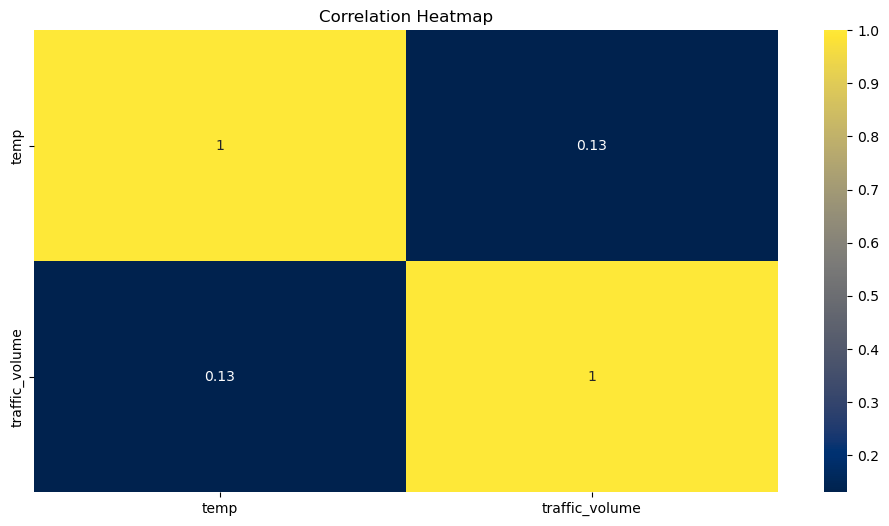

In [278]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='cividis')
plt.title("Correlation Heatmap")
plt.show()

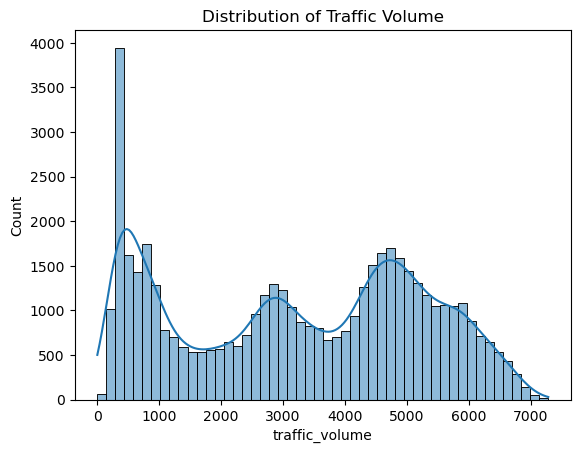

In [252]:
sns.histplot(df['traffic_volume'], bins=50, kde=True)
plt.title("Distribution of Traffic Volume")
plt.show()

In [253]:
#Simple Linear Regression
X = df[['traffic_volume']]
Y = df['temp']

In [254]:

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [255]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [256]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [257]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [0.000878]
Intercept: 278.3382859079067


In [258]:
## Prediction for test data
y_pred=regression.predict(X_test)

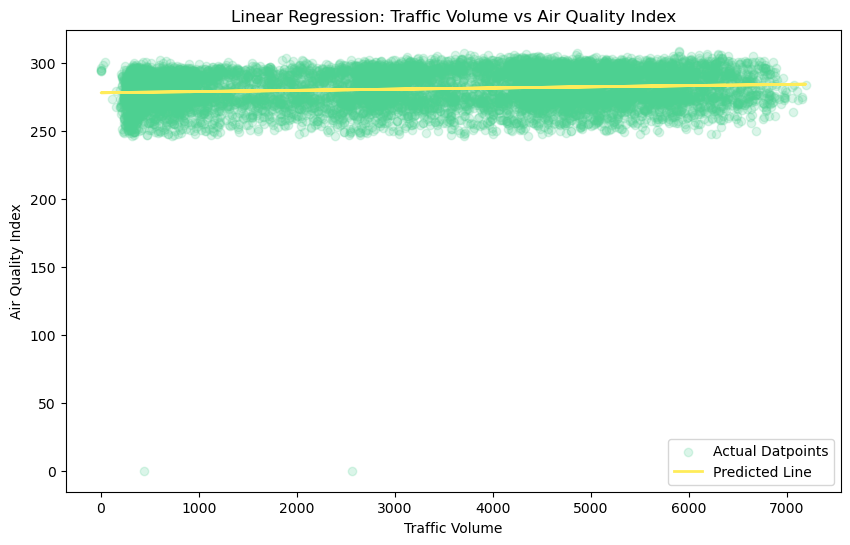

In [285]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test, alpha=0.2, color='#4DD091', label='Actual Datpoints')
plt.plot(X_test, y_pred, color='#FFEC59', linewidth=2, label='Predicted Line')
plt.xlabel("Traffic Volume")
plt.ylabel("Air Quality Index")
plt.title("Linear Regression: Traffic Volume vs Air Quality Index")
plt.legend()
plt.show()

In [260]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [265]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
R2=r2_score(Y_test,y_pred)
print("Mean Squared Error is ", mse)
print("Mean Absolute Error is ", mae)
print("Root Mean Squared Error is ", rmse)
print("R-Square Score is ", R2)

Mean Squared Error is  173.95301488103587
Mean Absolute Error is  10.741336300548479
Root Mean Squared Error is  13.189124871690156
R-Square Score is  0.016580515641614446


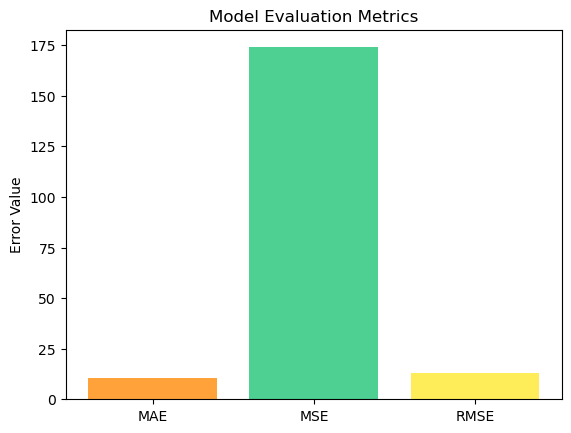

In [281]:
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

bars = plt.bar(metrics, values, color=['#FFA23A','#4DD091','#FFEC59'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Error Value')
plt.show()

In [262]:
## OLS Linear Regression
import statsmodels.api as sm

In [263]:
model=sm.OLS(Y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

35748    402.029458
147      128.240069
24362     44.726093
35495    128.176897
11010    235.885920
            ...    
6401     157.362568
34004    331.718524
46086    140.495524
42579    184.968927
23709     57.486928
Length: 9641, dtype: float64


In [264]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   temp   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                          1.057e+05
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                        0.00
Time:                        20:44:21   Log-Likelihood:                     -2.4678e+05
No. Observations:               38563   AIC:                                  4.936e+05
Df Residuals:                   38562   BIC:                                  4.936e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------